# Matplotlib: Laying out your figure

Figures with more than one panel (subplot) can be made using the subplot syntax, or the more elaborate `GridSpec` method.

## Subplots

Subplots can be made using `add_subplot(rows, columns, index)`:

In [1]:
%config InlineBackend.figure_format = 'svg'

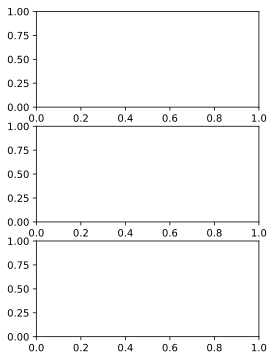

In [2]:
import matplotlib.pyplot as plt

# Three plots, above each other
fig = plt.figure(figsize=(4, 6))
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
plt.show()

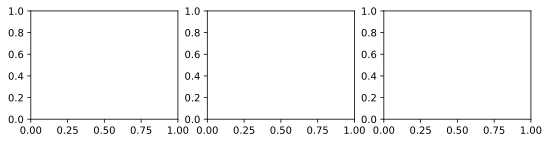

In [3]:
# Three plots, next to each other
fig = plt.figure(figsize=(9, 2))
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
plt.show()

More complex plots can be made by changing the rows & columns halfway through:

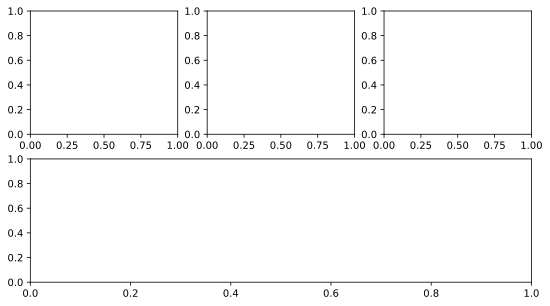

In [4]:
fig = plt.figure(figsize=(9, 5))
ax00 = fig.add_subplot(2, 3, 1)
ax01 = fig.add_subplot(2, 3, 2)
ax02 = fig.add_subplot(2, 3, 3)
ax10 = fig.add_subplot(2, 1, 2)
plt.show()

If your busy schedule does not permit the additions of commas, a less flexible shorthand can be used:

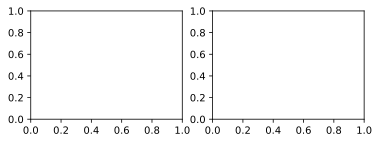

In [5]:
# Two plots, next to each other
fig = plt.figure(figsize=(6, 2))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
plt.show()

### Padding

Padding around and between subplots can be set with [subplots_adjust(left, bottom, right, top, wspace, hspace)](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust).

(For annoying reasons, `plt.plot` does not respect these settings, so we save and display with markdown instead)

In [6]:
# Two plots, next to each other
fig = plt.figure(figsize=(6, 3), facecolor='#cccccc')
fig.subplots_adjust(0.061, 0.15, 0.98, 0.97, wspace=0.25)
ax0 = fig.add_subplot(121)
ax0.set_xlabel('Width (m)')
ax0.set_ylabel('Height (m)')
ax1 = fig.add_subplot(122)
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Dinosaurs')
plt.savefig('figures-3/padding-1.svg')
plt.close()

![example](figures-3/padding-1.svg)

## Gridspec and subgridspec


A more flexible way to make subplots is provided by the [GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) classes.

It can do things that subplot does:

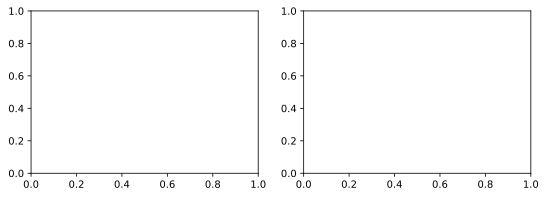

In [7]:
# Two plots, next to each other
fig = plt.figure(figsize=(9, 3))
grid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])
plt.show()

But the grid's array indexing allows for more fun stuff:

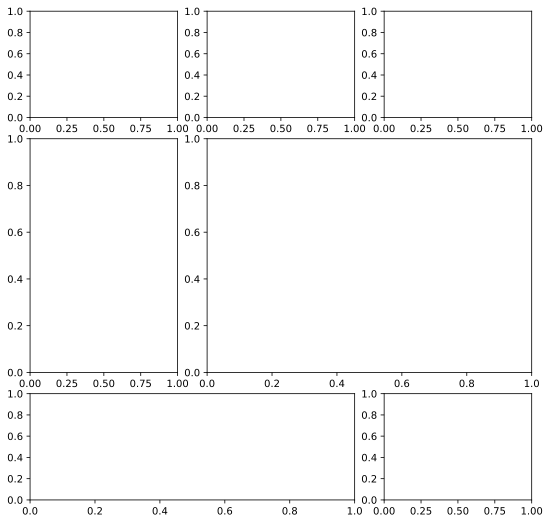

In [8]:
# A complex layout
fig = plt.figure(figsize=(9, 9))
grid = fig.add_gridspec(4, 3)
ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax02 = fig.add_subplot(grid[0, 2])
ax10 = fig.add_subplot(grid[1:3, 0])
ax11 = fig.add_subplot(grid[1:3, 1:])
ax20 = fig.add_subplot(grid[3, :2])
ax21 = fig.add_subplot(grid[3, 2])
plt.show()

We can even define grids within grids:

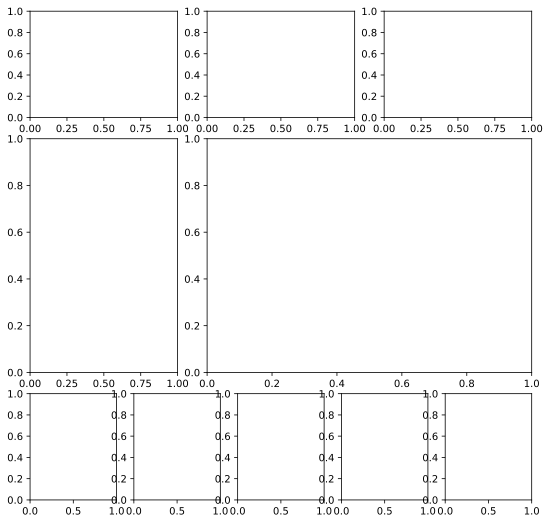

In [9]:
# A very complex layout
fig = plt.figure(figsize=(9, 9))
grid = fig.add_gridspec(4, 3)
ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax02 = fig.add_subplot(grid[0, 2])
ax10 = fig.add_subplot(grid[1:3, 0])
ax11 = fig.add_subplot(grid[1:3, 1:])
grid2 = grid[3, :].subgridspec(1, 5)
ax20 = fig.add_subplot(grid2[0, 0])
ax21 = fig.add_subplot(grid2[0, 1])
ax22 = fig.add_subplot(grid2[0, 2])
ax23 = fig.add_subplot(grid2[0, 3])
ax24 = fig.add_subplot(grid2[0, 4])
plt.show()

### Padding and gridspecs

Gridspecs also allow more fine-grained control of spacing between subplots:

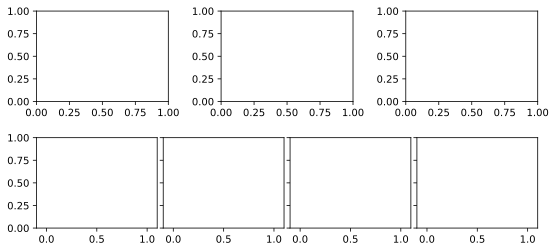

In [10]:
# A very complex layout
fig = plt.figure(figsize=(9, 4))
grid = fig.add_gridspec(2, 3, wspace=0.4, hspace=0.4)
ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax02 = fig.add_subplot(grid[0, 2])
grid2 = grid[1, :].subgridspec(1, 4, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(grid2[0, i])
    ax.set_xlim(-0.1, 1.1)
    if i > 0:
        ax.set_yticklabels([])

plt.show()

## Repeated graphs

Quite often we have the same quantities on several x and y axes.
In these cases it can help to:

- Use the same y limits for each graph, so that we can compare between panels
- Save space by removing labels and ticks


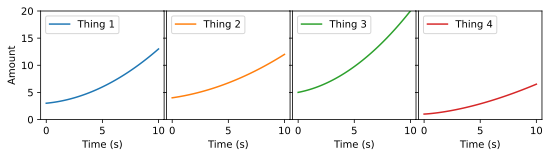

In [16]:
import numpy as np

t = np.linspace(0, 10, 50)
c1 = 3 + 0.2 * t + 0.08 * t**2
c2 = 4 + 0.3 * t + 0.05 * t**2
c3 = 5 + 0.4 * t + 0.11 * t**2
c4 = 1 + 0.1 * t + 0.09 * t**1.7

# Shared y limits
ylim = 0, 20

fig = plt.figure(figsize=(9, 2))
grid = fig.add_gridspec(1, 4, wspace=0.02)
ax0 = fig.add_subplot(grid[0, 0])
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Amount')
ax0.set_ylim(*ylim)
ax0.plot(t, c1, color='tab:blue', label='Thing 1')
ax0.legend(loc='upper left')

ax1 = fig.add_subplot(grid[0, 1])
ax1.set_xlabel('Time (s)')
ax1.set_yticklabels([])
ax1.set_ylim(*ylim)
ax1.plot(t, c2, color='tab:orange', label='Thing 2')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(grid[0, 2])
ax2.set_xlabel('Time (s)')
ax2.set_yticklabels([])
ax2.set_ylim(*ylim)
ax2.plot(t, c3, color='tab:green', label='Thing 3')
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(grid[0, 3])
ax3.set_xlabel('Time (s)')
ax3.set_yticklabels([])
ax3.set_ylim(*ylim)
ax3.plot(t, c4, color='tab:red', label='Thing 4')
ax3.legend(loc='upper left')

plt.show()